# 1. Import useful modules and packages

In [1]:
import sys
sys.path.append('/home/decker/lab433')

from synoptic import SFC, yymmddhh, slp_formatter

from datetime import datetime, timedelta
from metpy.io import metar
from metpy.plots.declarative import PlotObs, MapPanel, PanelContainer
import cartopy.crs as ccrs

# 2. Get the data

In [2]:
# What date/time do we want to plot?
plot_time = datetime(2024, 11, 14, 22)
# How do I know the order to put the numbers above?
# Put cursor inside the parentheses and type Shift-Tab

ymdh_str = yymmddhh(plot_time)

sfc_file = SFC + ymdh_str + '_sao.txt'

In [3]:
sfc_obs = metar.parse_metar_file(sfc_file)

# 3. Compute diagnostics of interest

In this case, the computations consist of unit conversions and massaging the SLP into the standard three-character format (1023.8 mb = '238'), both of which can be handled by the MetPy declarative plotting interface directly.

# 4. Inform MetPy _what_ it is we are plotting

More details pertaining to these attributes can be found in the handout (and the MetPy documentation).

In [4]:
obs = PlotObs()
obs.data = sfc_obs
obs.time = plot_time
obs.time_window = timedelta(minutes=15)
obs.level = None
obs.fields = ['cloud_coverage', 'air_temperature', 'dew_point_temperature',
              'air_pressure_at_sea_level', 'current_wx1_symbol']
obs.plot_units = [None, 'degF', 'degF', None, None]
obs.locations = ['C', 'NW', 'SW', 'NE', 'W']
obs.colors = ['black', 'red', 'green', 'royalblue', 'brown']
obs.formats = ['sky_cover', None, None, slp_formatter, 'current_weather']
obs.reduce_points = 2
obs.vector_field = ['eastward_wind', 'northward_wind']

# 5. Inform MetPy _where_ it is we are plotting

In [5]:
panel = MapPanel()
panel.projection = 'mer'
panel.area = (-130,-60,24,55)
panel.layers = ['coastline','borders','states']
panel.title = f'Surface observations at {plot_time}Z'
panel.plots = [obs]

# 6. Display the plot

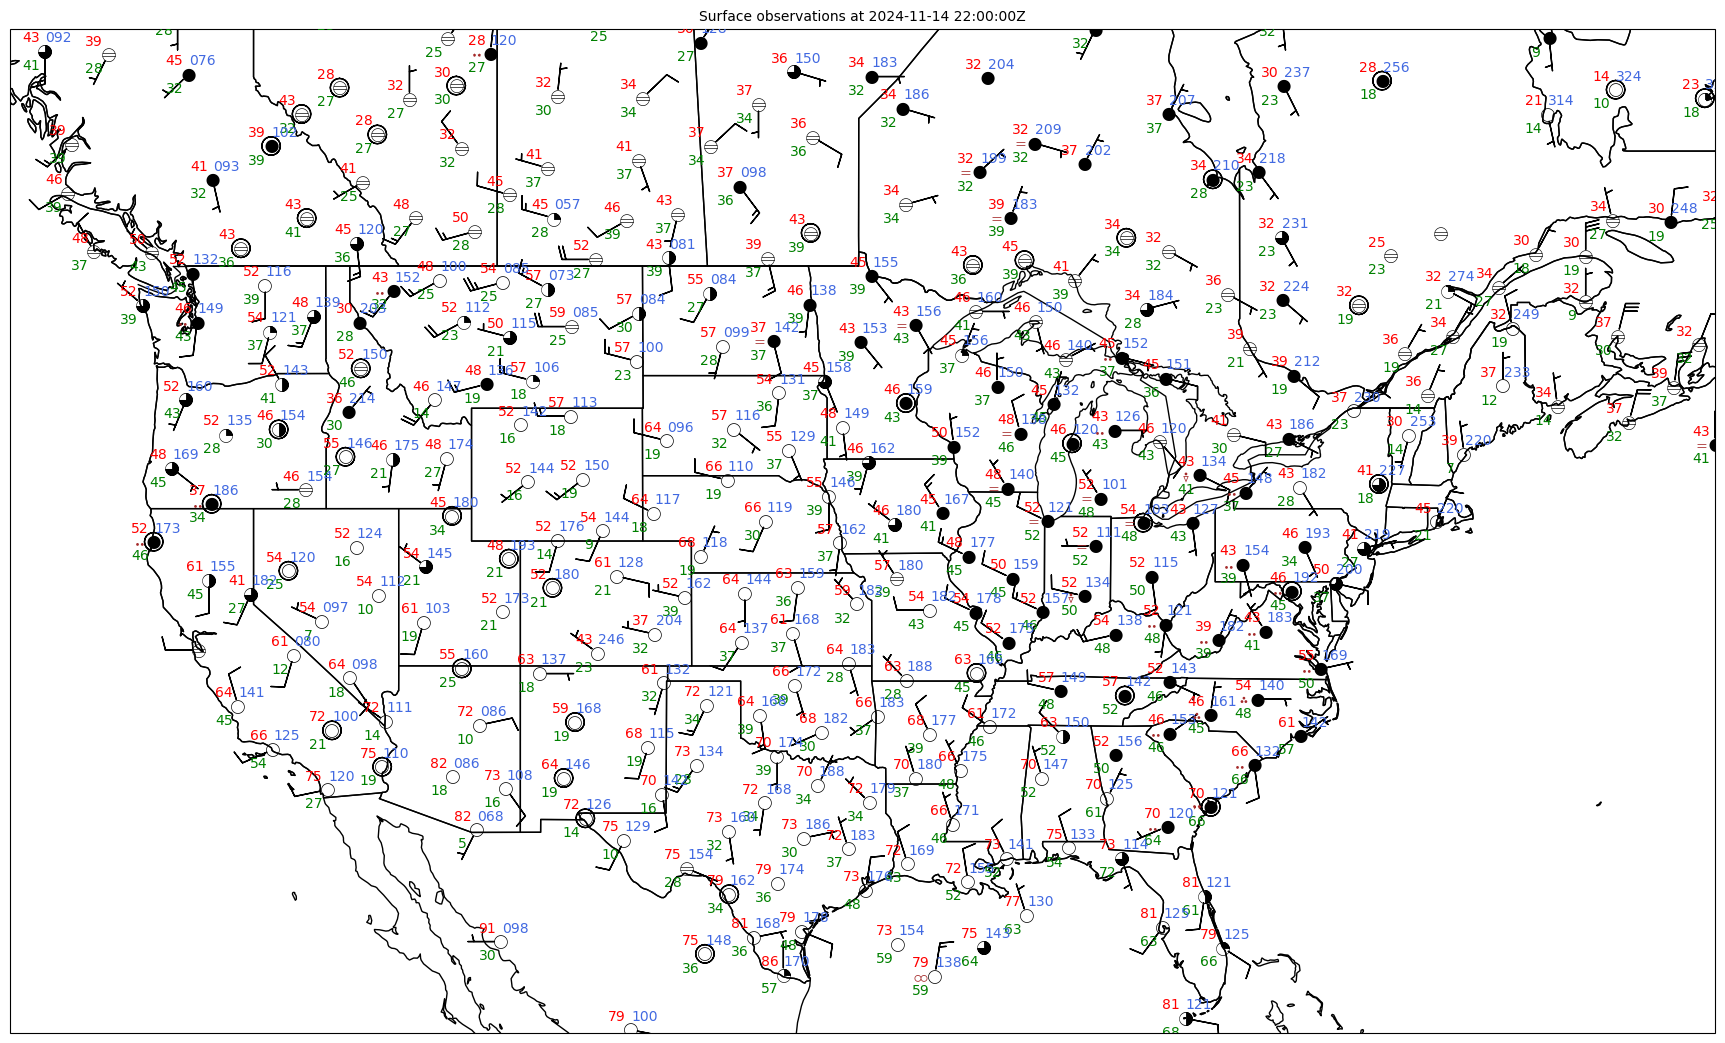

In [6]:
pc = PanelContainer()
# In general, use whatever size you want, but for printing, use (22, 17) or (17, 22)
pc.size = (22, 17)
pc.panels = [panel]

pc.show()

In [7]:
# Good settings for printing
pc.save('sfc_mapWX2.svg', bbox_inches='tight', dpi=300)